# 4 classes

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df_data = pd.read_csv('/content/lda_data.csv')

In [2]:
df_data.shape
df_data = df_data.drop(df_data.columns[0], axis=1)
df_data

NameError: ignored

In [ ]:
y = []
for i in range(21165):
  if(i<3616) : y.append(0)
  elif(i>=3616 and i < 9628) : y.append(1)
  elif(i>=9628 and i < 19820) : y.append(2)
  else: y.append(3)
Y = np.asarray(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_data, Y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.125, random_state=42)


##Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import accuracy_score

best depth: 7


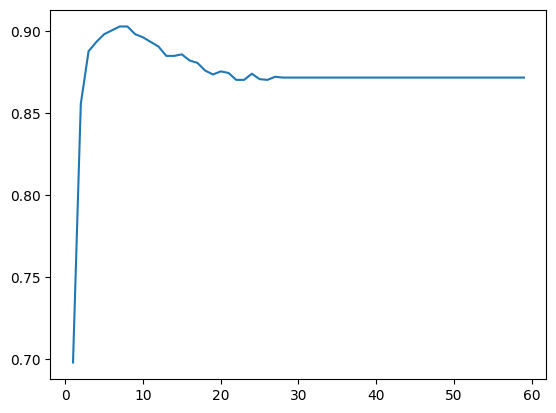

In [ ]:
def Dtclf(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(1,60):
    Dt_clf_df = DecisionTreeClassifier(max_depth=i, random_state=23)
    Dt_clf_df.fit(X_train, Y_train)
    y_1 = Dt_clf_df.predict(X_val)
    a = accuracy_score(Y_val, y_1)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
a1,arr,max = Dtclf(X_train,y_train,X_valid,y_valid)   
# Dt_clf_df = DecisionTreeClassifier(max_depth=a, random_state=23)
# print(f'best accuracy: {max*100}%')
print(f'best depth: {a1}')
plt.plot(np.arange(1,60),arr)

min sample: 59


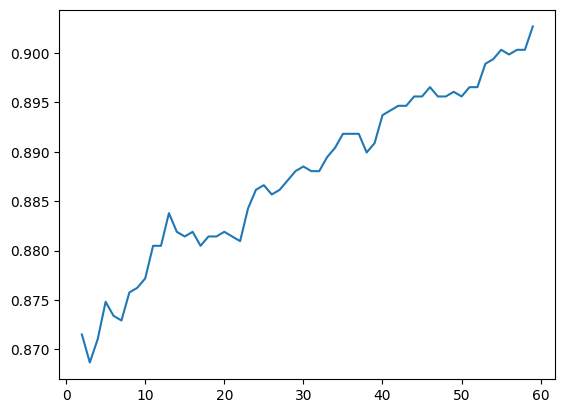

In [ ]:
def Dtclf(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(2,60):
    Dt_clf_df = DecisionTreeClassifier(min_samples_split =i, random_state=23)
    Dt_clf_df.fit(X_train, Y_train)
    y_1 = Dt_clf_df.predict(X_val)
    a = accuracy_score(Y_val, y_1)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
a2,arr,max = Dtclf(X_train,y_train,X_valid,y_valid)   
# Dt_clf_df = DecisionTreeClassifier(max_depth=a, random_state=23)
# print(f'best accuracy: {max*100}%')
print(f'min sample: {a2}')
plt.plot(np.arange(2,60),arr)

min_samples_leaf: 30


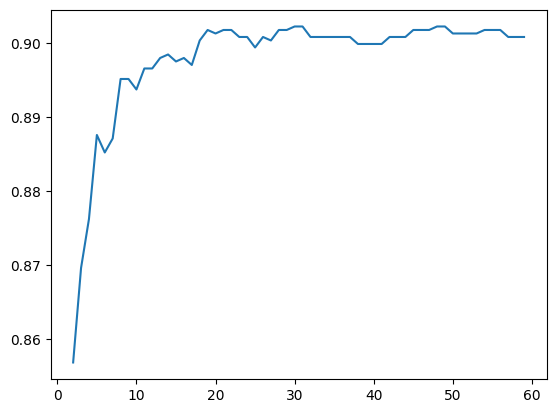

In [ ]:
def Dtclf(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(2,60):
    Dt_clf_df = DecisionTreeClassifier(min_samples_leaf =i, random_state=23)
    Dt_clf_df.fit(X_train, Y_train)
    y_1 = Dt_clf_df.predict(X_val)
    a = accuracy_score(Y_val, y_1)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
a3,arr,max = Dtclf(X_train,y_train,X_valid,y_valid)   
# Dt_clf_df = DecisionTreeClassifier(max_depth=a, random_state=23)
# print(f'best accuracy: {max*60}%')
print(f'min_samples_leaf: {a3}')
plt.plot(np.arange(2,60),arr)

In [ ]:
Dt_clf_df = DecisionTreeClassifier(max_depth=a1, min_samples_split =a2, min_samples_leaf = a3,random_state=23)
Dt_clf_df.fit(X_train, y_train)
y_1 = Dt_clf_df.predict(X_test)
a = accuracy_score(y_test, y_1)
print(a)

0.9062130876446964


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best accuracy: 90.59768485707535%
n_estimators: 16


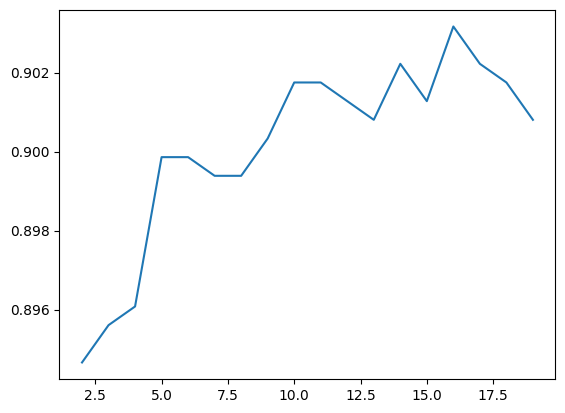

In [ ]:
def Rand(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(2,20):
    rf = RandomForestClassifier(n_estimators=(10*i), random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    a = accuracy_score(Y_val, y_pred)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
a,arr,max = Rand(X_train,y_train,X_valid,y_valid)   

rf = RandomForestClassifier(n_estimators=(10*a), random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f'best accuracy: {accuracy_score(y_test, y_pred)*100}%')
print(f'n_estimators: {a}')
plt.plot(np.arange(2,20),arr)

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Adaboost - LightGBM - XGBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#
# y_p = clf1.predict(X_test)
# # print(f'accuracy: {accuracy_score(y_test, y_p)*100}%')
# clf1 = AdaBoostClassifier()
# param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500]}
# grid_search = GridSearchCV(clf1, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# print(f"Best n_estimators: {grid_search.best_params_['n_estimators']}")


def Ada(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(1,15):
    rf = AdaBoostClassifier(n_estimators=i*25, random_state=0).fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    a = accuracy_score(Y_val, y_pred)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
a,arr,max =Ada(X_train,y_train,X_valid,y_valid)   

bes accuracy: 89.06213087644697%
n_estimators 25


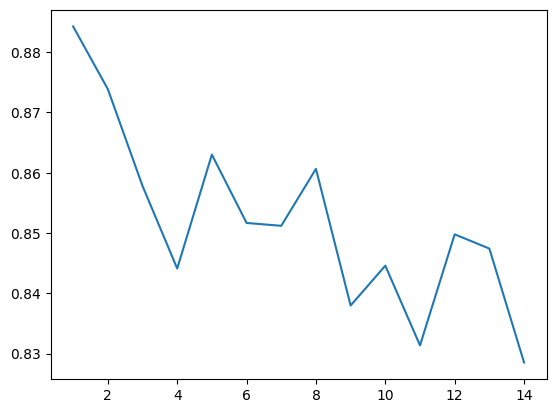

In [ ]:

ada = AdaBoostClassifier(n_estimators=a*25, random_state=0).fit(X_train, y_train)
y_pred = ada.predict(X_test)

print(f'bes accuracy: {accuracy_score(y_test, y_pred)*100}%')
print(f'n_estimators {a*25}')
plt.plot(np.arange(1,15),arr)

In [ ]:
import lightgbm as lgb
mse=[]
b = -float('inf')
best = 0;
mse1=[]
b1 = -float('inf')
best1 = 0;
for i in range(2,35):
  clf = lgb.LGBMClassifier(num_leaves=i)
  clf.fit(X_train, y_train)
  y_p = clf.predict(X_valid)
  a = accuracy_score(y_valid, y_p)
  if a>b:
    b=a
    best = i
  mse.append(a)
  clf = lgb.LGBMClassifier(max_depth=i)
  clf.fit(X_train, y_train)
  y_p = clf.predict(X_valid)
  a = accuracy_score(y_valid, y_p)
  if a>b1:
    b1=a
    best1 = i
  mse1.append(a)
mse = np.array(mse)

clf = lgb.LGBMClassifier(num_leaves=best , max_depth = best1)
clf.fit(X_train, y_train)
y_p = clf.predict(X_test)
a = accuracy_score(y_test, y_p)
print(f'best num_leaves: {best}')
print(f'best max_depth: {best1}')
print(f'best accuracy:{a}' )

best num_leaves: 16
best max_depth: 2
best accuracy:0.9066855657925821


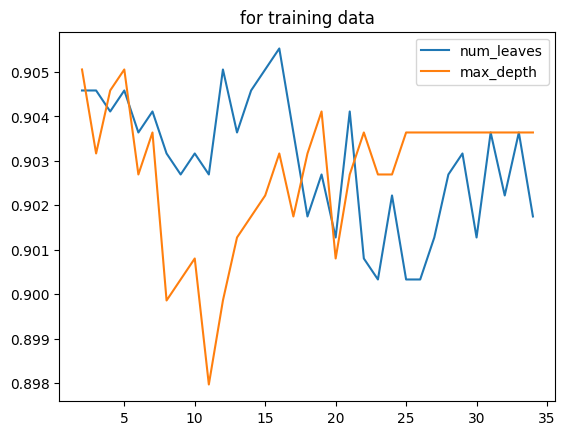

In [ ]:
plt.title('for training data')
plt.plot(np.arange(2,35),mse,label='num_leaves')
plt.plot(np.arange(2,35),mse1,label='max_depth')
plt.legend()
plt.show()

In [ ]:
import xgboost as xgb
clf2 = xgb.XGBClassifier(subsample=0.7)
clf2.fit(X_train, y_train)
y_p = clf2.predict(X_test)
y_p1 = clf2.predict(X_train)
a = accuracy_score(y_test, y_p)
a1 = accuracy_score(y_train, y_p1)
print(f'the value of accuracy for training set: {a1*100}%')
print(f'the value of accuracy for testing set: {a*100}%')

the value of accuracy for training set: 96.85453931825853%
the value of accuracy for testing set: 90.24332624616112%


##SVM

In [ ]:
from sklearn import svm
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

best_c = None
best_val_score = 0

for c in c_values:
    clf = svm.SVC(kernel='linear', C=c)
    clf.fit(X_train, y_train)
    val_score = accuracy_score(y_valid, clf.predict(X_valid))
    print(f"C = {c:.4f}, Validation Score = {val_score:.4f}")
    if val_score > best_val_score:
        best_val_score = val_score
        best_c = c

print(f"Best C = {best_c:.2f}, Best Validation Score = {best_val_score:.4f}")



C = 0.0001, Validation Score = 0.8923
C = 0.0010, Validation Score = 0.9084
C = 0.0100, Validation Score = 0.9065
C = 0.1000, Validation Score = 0.9051
C = 1.0000, Validation Score = 0.9051
C = 10.0000, Validation Score = 0.9051
Best C = 0.00, Best Validation Score = 0.9084


In [ ]:
from sklearn import svm
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

best_c = None
best_val_score = 0

for c in c_values:
    clf = svm.SVC(kernel='rbf', C=c)
    clf.fit(X_train, y_train)
    val_score = accuracy_score(y_valid, clf.predict(X_valid))
    print(f"C = {c:.4f}, Validation Score = {val_score:.4f}")
    if val_score > best_val_score:
        best_val_score = val_score
        best_c = c

print(f"Best C = {best_c:.2f}, Best Validation Score = {best_val_score:.4f}")

C = 0.0001, Validation Score = 0.4875
C = 0.0010, Validation Score = 0.8337
C = 0.0100, Validation Score = 0.9074
C = 0.1000, Validation Score = 0.9046
C = 1.0000, Validation Score = 0.9051
C = 10.0000, Validation Score = 0.9051
Best C = 0.01, Best Validation Score = 0.9074


# implementation on binary data

In [ ]:
data=df_data.copy()
data_pts1, features1 = data.shape
data

,Column 1,Column 2,Column 2.1
0,0.227300,0.559677,-3.679093
1,-0.020349,3.239331,-1.686466
2,1.379098,1.789280,-1.835432
3,0.251756,1.139288,-1.543842
4,-0.379345,3.790370,-3.517264
...,...,...,...
21160,10.178745,-0.777209,1.922609
21161,4.948775,0.628859,-1.315857
21162,8.414933,-0.878564,0.313266
21163,5.201088,-0.852703,0.941439


In [ ]:
Y1 = Y.copy()
Y1

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
for i in range(len(Y1)):
  if Y1[i] != 0 : Y1[i]=1;


In [ ]:
Y1

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, Y1, test_size=0.2, random_state=42)
X_train1, X_valid1, y_train1, y_valid1= train_test_split(X_train1, y_train1, test_size=0.125, random_state=42)


##Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

best depth: 4


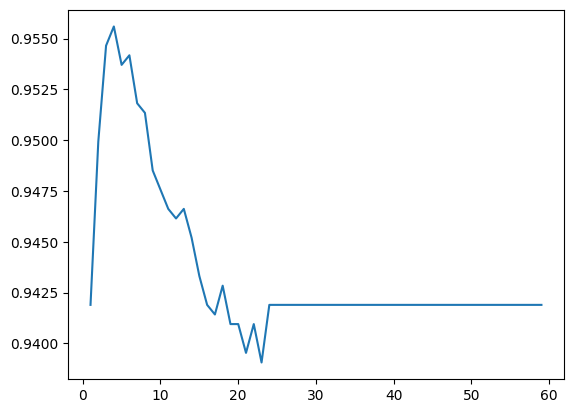

In [ ]:
def Dtclf(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(1,60):
    Dt_clf_df = DecisionTreeClassifier(max_depth=i, random_state=23)
    Dt_clf_df.fit(X_train, Y_train)
    y_1 = Dt_clf_df.predict(X_val)
    a = accuracy_score(Y_val, y_1)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
a1,arr,max = Dtclf(X_train1,y_train1,X_valid1,y_valid1)   
# Dt_clf_df = DecisionTreeClassifier(max_depth=a, random_state=23)
# print(f'best accuracy: {max*100}%')
print(f'best depth: {a1}')
plt.plot(np.arange(1,60),arr)

best depth: 4


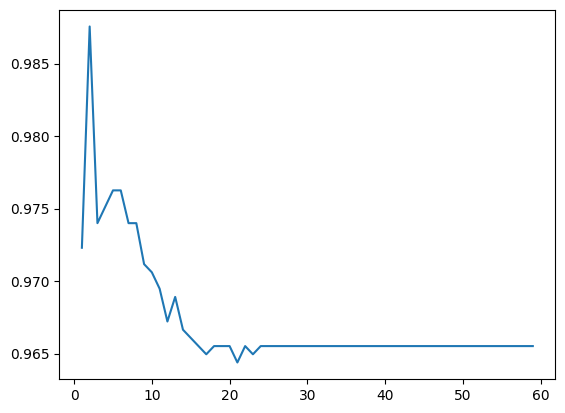

In [ ]:
def Dtclf(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(1,60):
    Dt_clf_df = DecisionTreeClassifier(max_depth=i, random_state=23)
    Dt_clf_df.fit(X_train, Y_train)
    y_1 = Dt_clf_df.predict(X_val)
    a = recall_score(Y_val, y_1)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
r1,arr,max = Dtclf(X_train1,y_train1,X_valid1,y_valid1)   
# Dt_clf_df = DecisionTreeClassifier(max_depth=a, random_state=23)
# print(f'best accuracy: {max*100}%')
print(f'best depth: {a1}')
plt.plot(np.arange(1,60),arr)

min sample: 51


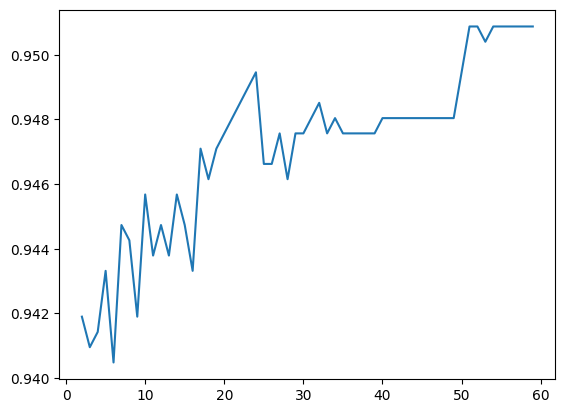

In [ ]:
def Dtclf(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(2,60):
    Dt_clf_df = DecisionTreeClassifier(min_samples_split =i, random_state=23)
    Dt_clf_df.fit(X_train, Y_train)
    y_1 = Dt_clf_df.predict(X_val)
    a = accuracy_score(Y_val, y_1)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
a2,arr,max = Dtclf(X_train1,y_train1,X_valid1,y_valid1)   
# Dt_clf_df = DecisionTreeClassifier(max_depth=a, random_state=23)
# print(f'best accuracy: {max*100}%')
print(f'min sample: {a2}')
plt.plot(np.arange(2,60),arr)

min sample: 51


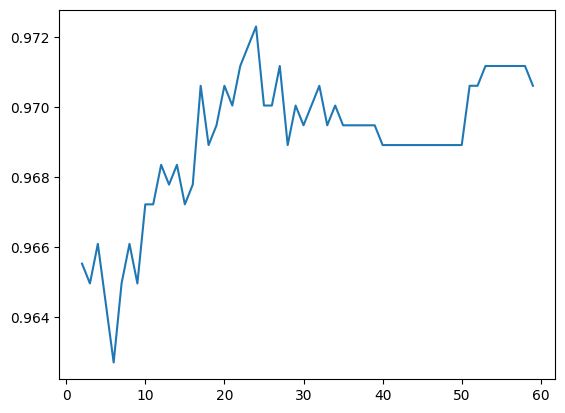

In [ ]:
def Dtclf(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(2,60):
    Dt_clf_df = DecisionTreeClassifier(min_samples_split =i, random_state=23)
    Dt_clf_df.fit(X_train, Y_train)
    y_1 = Dt_clf_df.predict(X_val)
    a = recall_score(Y_val, y_1)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
r2,arr,max = Dtclf(X_train1,y_train1,X_valid1,y_valid1)   
# Dt_clf_df = DecisionTreeClassifier(max_depth=a, random_state=23)
# print(f'best accuracy: {max*100}%')
print(f'min sample: {a2}')
plt.plot(np.arange(2,60),arr)

min_samples_leaf: 38


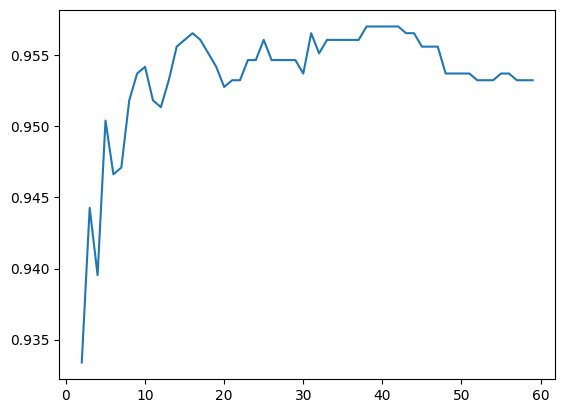

In [ ]:
def Dtclf(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(2,60):
    Dt_clf_df = DecisionTreeClassifier(min_samples_leaf =i, random_state=23)
    Dt_clf_df.fit(X_train, Y_train)
    y_1 = Dt_clf_df.predict(X_val)
    a = accuracy_score(Y_val, y_1)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
a3,arr,max = Dtclf(X_train1,y_train1,X_valid1,y_valid1)   
# Dt_clf_df = DecisionTreeClassifier(max_depth=a, random_state=23)
# print(f'best accuracy: {max*60}%')
print(f'min_samples_leaf: {a3}')
plt.plot(np.arange(2,60),arr)

min_samples_leaf: 38


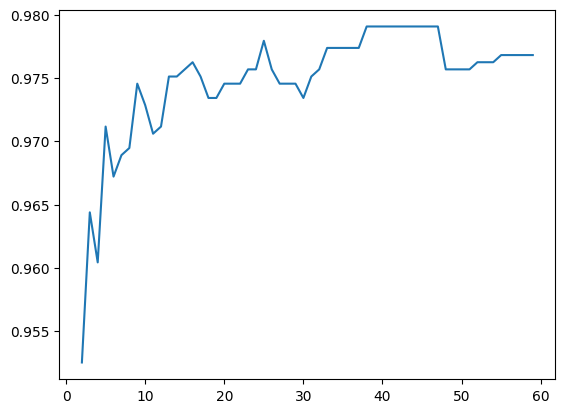

In [ ]:
def Dtclf(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(2,60):
    Dt_clf_df = DecisionTreeClassifier(min_samples_leaf =i, random_state=23)
    Dt_clf_df.fit(X_train, Y_train)
    y_1 = Dt_clf_df.predict(X_val)
    a = recall_score(Y_val, y_1)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
r3,arr,max = Dtclf(X_train1,y_train1,X_valid1,y_valid1)   
# Dt_clf_df = DecisionTreeClassifier(max_depth=a, random_state=23)
# print(f'best accuracy: {max*60}%')
print(f'min_samples_leaf: {a3}')
plt.plot(np.arange(2,60),arr)

In [ ]:
Dt_clf_df = DecisionTreeClassifier(max_depth=a1, min_samples_split =a2, min_samples_leaf = a3,random_state=23)
Dt_clf_df.fit(X_train1, y_train1)
y_1 = Dt_clf_df.predict(X_test1)
a = accuracy_score(y_test1, y_1)
print(a)

0.9640916607606899


In [ ]:
Dt_clf_df = DecisionTreeClassifier(max_depth=r1, min_samples_split =r2, min_samples_leaf = r3, random_state=23)
Dt_clf_df.fit(X_train1, y_train1)
y_1 = Dt_clf_df.predict(X_test1)
a = recall_score(y_test1, y_1)
print(a)

0.9898074745186863


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best accuracy: 96.36191826128041%
n_estimators: 3


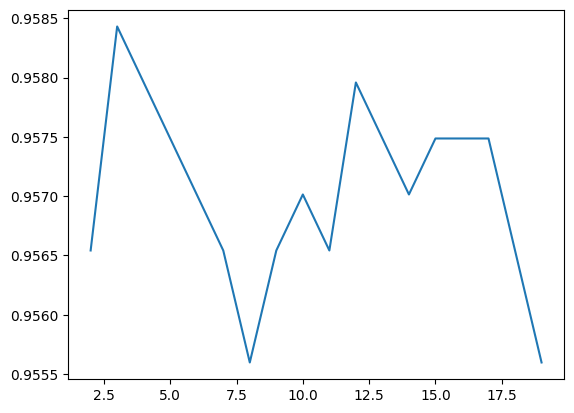

In [ ]:
def Rand(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(2,20):
    rf = RandomForestClassifier(n_estimators=(10*i), random_state=42)
    rf.fit(X_train, Y_train)
    y_pred = rf.predict(X_val)
    a = accuracy_score(Y_val, y_pred)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
a,arr,max = Rand(X_train1,y_train1,X_valid1,y_valid1)   

rf = RandomForestClassifier(n_estimators=(10*a), random_state=42)
rf.fit(X_train1, y_train1)
y_pred = rf.predict(X_test1)

print(f'best accuracy: {accuracy_score(y_test1, y_pred)*100}%')
print(f'n_estimators: {a}')
plt.plot(np.arange(2,20),arr)

best accuracy: 98.55605889014723%
n_estimators: 3


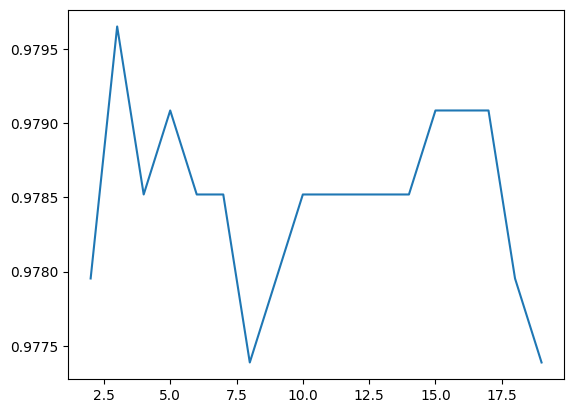

In [ ]:
def Rand(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(2,20):
    rf = RandomForestClassifier(n_estimators=(10*i), random_state=42)
    rf.fit(X_train, Y_train)
    y_pred = rf.predict(X_val)
    a = recall_score(Y_val, y_pred)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
a,arr,max = Rand(X_train1,y_train1,X_valid1,y_valid1)   

rf = RandomForestClassifier(n_estimators=(10*a), random_state=42)
rf.fit(X_train1, y_train1)
y_pred = rf.predict(X_test1)

print(f'best accuracy: {recall_score(y_test1, y_pred)*100}%')
print(f'n_estimators: {a}')
plt.plot(np.arange(2,20),arr)

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Adaboost - LightGBM - XGBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#
# y_p = clf1.predict(X_test)
# # print(f'accuracy: {accuracy_score(y_test, y_p)*100}%')
# clf1 = AdaBoostClassifier()
# param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500]}
# grid_search = GridSearchCV(clf1, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# print(f"Best n_estimators: {grid_search.best_params_['n_estimators']}")


def Ada(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(1,15):
    rf = AdaBoostClassifier(n_estimators=i*25, random_state=0).fit(X_train, Y_train)
    y_pred = rf.predict(X_val)
    a = accuracy_score(Y_val, y_pred)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
a,arr,max =Ada(X_train1,y_train1,X_valid1,y_valid1)   

bes accuracy: 96.48003779825183%
n_estimators 225


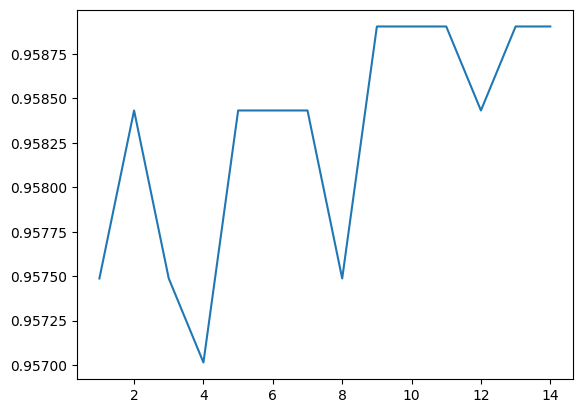

In [ ]:

ada = AdaBoostClassifier(n_estimators=a*25, random_state=0).fit(X_train1, y_train1)
y_pred = ada.predict(X_test1)

print(f'bes accuracy: {accuracy_score(y_test1, y_pred)*100}%')
print(f'n_estimators {a*25}')
plt.plot(np.arange(1,15),arr)

bes accuracy: 98.86749716874293%
n_estimators 25


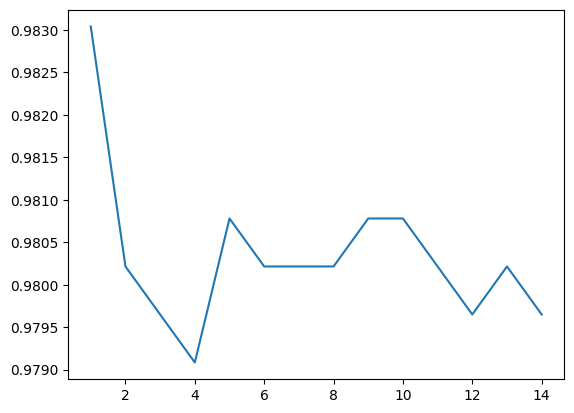

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#
# y_p = clf1.predict(X_test)
# # print(f'accuracy: {accuracy_score(y_test, y_p)*100}%')
# clf1 = AdaBoostClassifier()
# param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500]}
# grid_search = GridSearchCV(clf1, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# print(f"Best n_estimators: {grid_search.best_params_['n_estimators']}")


def Ada(X_train,Y_train,X_val,Y_val):
  MSE=[]
  best1 = None
  b = -10000000000000000
  for i in range(1,15):
    rf = AdaBoostClassifier(n_estimators=i*25, random_state=0).fit(X_train, Y_train)
    y_pred = rf.predict(X_val)
    a = recall_score(Y_val, y_pred)
    if a>b:
      b=a
      best1 = i
    MSE.append(a)
  return best1 ,MSE, b
a,arr,max =Ada(X_train1,y_train1,X_valid1,y_valid1) 
ada = AdaBoostClassifier(n_estimators=a*25, random_state=0).fit(X_train1, y_train1)
y_pred = ada.predict(X_test1)

print(f'bes accuracy: {recall_score(y_test1, y_pred)*100}%')
print(f'n_estimators {a*25}')
plt.plot(np.arange(1,15),arr)  

In [ ]:
import lightgbm as lgb
mse=[]
b = -float('inf')
best = 0;
mse1=[]
b1 = -float('inf')
best1 = 0;
for i in range(2,35):
  clf = lgb.LGBMClassifier(num_leaves=i)
  clf.fit(X_train1, y_train1)
  y_p = clf.predict(X_valid1)
  a = accuracy_score(y_valid1, y_p)
  if a>b:
    b=a
    best = i
  mse.append(a)
  clf = lgb.LGBMClassifier(max_depth=i)
  clf.fit(X_train1, y_train1)
  y_p = clf.predict(X_valid1)
  a = accuracy_score(y_valid1, y_p)
  if a>b1:
    b1=a
    best1 = i
  mse1.append(a)
mse = np.array(mse)

clf = lgb.LGBMClassifier(num_leaves=best , max_depth = best1)
clf.fit(X_train1, y_train1)
y_p = clf.predict(X_test1)
a = accuracy_score(y_test1, y_p)
print(f'best num_leaves: {best}')
print(f'best max_depth: {best1}')
print(f'best accuracy:{a}' )

best num_leaves: 9
best max_depth: 3
best accuracy:0.9681077250177179


In [ ]:
import lightgbm as lgb
mse=[]
b = -float('inf')
best = 0;
mse1=[]
b1 = -float('inf')
best1 = 0;
for i in range(2,35):
  clf = lgb.LGBMClassifier(num_leaves=i)
  clf.fit(X_train1, y_train1)
  y_p = clf.predict(X_valid1)
  a = recall_score(y_valid1, y_p)
  if a>b:
    b=a
    best = i
  mse.append(a)
  clf = lgb.LGBMClassifier(max_depth=i)
  clf.fit(X_train1, y_train1)
  y_p = clf.predict(X_valid1)
  a = recall_score(y_valid1, y_p)
  if a>b1:
    b1=a
    best1 = i
  mse1.append(a)
mse = np.array(mse)

clf = lgb.LGBMClassifier(num_leaves=best , max_depth = best1)
clf.fit(X_train1, y_train1)
y_p = clf.predict(X_test1)
a = recall_score(y_test1, y_p)
print(f'best num_leaves: {best}')
print(f'best max_depth: {best1}')
print(f'best accuracy:{a}' )

best num_leaves: 3
best max_depth: 2
best accuracy:0.986409966024915


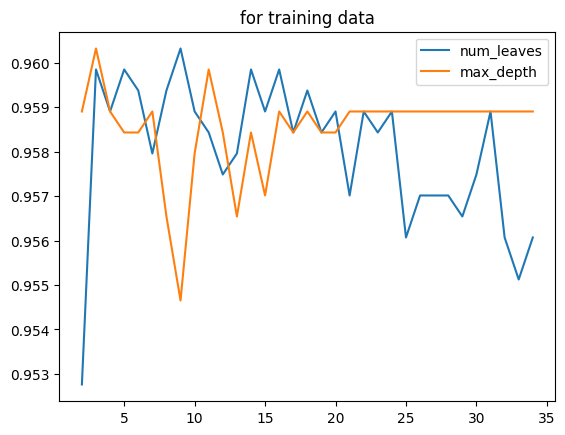

In [ ]:
plt.title('for training data')
plt.plot(np.arange(2,35),mse,label='num_leaves')
plt.plot(np.arange(2,35),mse1,label='max_depth')
plt.legend()
plt.show()

In [ ]:
import xgboost as xgb
clf2 = xgb.XGBClassifier(subsample=0.7)
clf2.fit(X_train1, y_train1)
y_p = clf2.predict(X_test1)
y_p1 = clf2.predict(X_train1)
a = accuracy_score(y_test1, y_p)
a1 = accuracy_score(y_train1, y_p1)
print(f'the value of accuracy for training set: {a1*100}%')
print(f'the value of accuracy for testing set: {a*100}%')

the value of accuracy for training set: 98.8525143435707%
the value of accuracy for testing set: 96.29104653909756%


In [ ]:
import xgboost as xgb
clf2 = xgb.XGBClassifier(subsample=0.7)
clf2.fit(X_train1, y_train1)
y_p = clf2.predict(X_test1)
y_p1 = clf2.predict(X_train1)
a = recall_score(y_test1, y_p)
a1 = recall_score(y_train1, y_p1)
print(f'the value of accuracy for training set: {a1*100}%')
print(f'the value of accuracy for testing set: {a*100}%')

the value of accuracy for training set: 99.47746570868713%
the value of accuracy for testing set: 98.18799546998868%


##SVM

In [ ]:
from sklearn import svm
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

best_c = None
best_val_score = 0

for c in c_values:
    clf = svm.SVC(kernel='linear', C=c)
    clf.fit(X_train1, y_train1)
    val_score = accuracy_score(y_valid, clf.predict(X_valid1))
    print(f"C = {c:.4f}, Validation Score = {val_score:.4f}")
    if val_score > best_val_score:
        best_val_score = val_score
        best_c = c

print(f"Best C = {best_c:.2f}, Best Validation Score = {best_val_score:.4f}")



C = 0.0001, Validation Score = 0.8923
C = 0.0010, Validation Score = 0.9084
C = 0.0100, Validation Score = 0.9065
C = 0.1000, Validation Score = 0.9051
C = 1.0000, Validation Score = 0.9051
C = 10.0000, Validation Score = 0.9051
Best C = 0.00, Best Validation Score = 0.9084


In [ ]:
from sklearn import svm
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

best_c = None
best_val_score = 0

for c in c_values:
    clf = svm.SVC(kernel='rbf', C=c)
    clf.fit(X_train1, y_train1)
    val_score = accuracy_score(y_valid1, clf.predict(X_valid1))
    print(f"C = {c:.4f}, Validation Score = {val_score:.4f}")
    if val_score > best_val_score:
        best_val_score = val_score
        best_c = c

print(f"Best C = {best_c:.2f}, Best Validation Score = {best_val_score:.4f}")

C = 0.0001, Validation Score = 0.4875
C = 0.0010, Validation Score = 0.8337
C = 0.0100, Validation Score = 0.9074
C = 0.1000, Validation Score = 0.9046
C = 1.0000, Validation Score = 0.9051
C = 10.0000, Validation Score = 0.9051
Best C = 0.01, Best Validation Score = 0.9074


In [ ]:
from sklearn import svm
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

best_c = None
best_val_score = 0

for c in c_values:
    clf = svm.SVC(kernel='linear', C=c)
    clf.fit(X_train1, y_train1)
    val_score = recall_score(y_valid1, clf.predict(X_valid1))
    print(f"C = {c:.4f}, Validation Score = {val_score:.4f}")
    if val_score > best_val_score:
        best_val_score = val_score
        best_c = c

print(f"Best C = {best_c:.2f}, Best Recall Score = {best_val_score:.4f}")



C = 0.0001, Validation Score = 0.9977
C = 0.0010, Validation Score = 0.9870
C = 0.0100, Validation Score = 0.9813
C = 0.1000, Validation Score = 0.9813
C = 1.0000, Validation Score = 0.9813
C = 10.0000, Validation Score = 0.9813
Best C = 0.00, Best Validation Score = 0.9977


In [ ]:
from sklearn import svm
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

best_c = None
best_val_score = 0

for c in c_values:
    clf = svm.SVC(kernel='rbf', C=c)
    clf.fit(X_train1, y_train1)
    val_score = accuracy_score(y_valid1, clf.predict(X_valid1))
    print(f"C = {c:.4f}, Validation Score = {val_score:.4f}")
    if val_score > best_val_score:
        best_val_score = val_score
        best_c = c

print(f"Best C = {best_c:.2f}, Best Recall = {best_val_score:.4f}")

C = 0.0001, Validation Score = 0.8356
C = 0.0010, Validation Score = 0.9060
C = 0.0100, Validation Score = 0.9575
C = 0.1000, Validation Score = 0.9603
C = 1.0000, Validation Score = 0.9608
C = 10.0000, Validation Score = 0.9608
Best C = 1.00, Best Validation Score = 0.9608
